# Banking Loan Eligibility Prediction of Small Businesses

#### Author: Misiriya Shahul Hameed, KAGGLEX-BIPOC Mentee, Chennai, India



## Introduction
This notebook was created as part of my project for the Kaggle BIPOC program. This projet is based on Predicting Approvals for Banking Loans. I decided to work on the U.S. Small Business Administrations Loan datasets, which are freely available online. So, we will see here, how to deal with Loan Approval Predictions using Machine Learning in Python.

My notebook consists of the following topics
* [Installation of Required Packages](#section1)
* [Load the Dataset](#section2)
* [Exploratory Analysis of Dataset](#section3)
    - [Pandas Profiling to Visualize information regarding the Dataset](#subsection3.1)
    - [Target Variable](#subsection3.2)
    - [Remove Duplicate Rows](#subsection3.3)
    - [Visualize Relations Between Data](#subsection3.4)
    - [Visualize Relationships between categorical data](#subsection3.5)
* [Encoding the Categorical Variables](#section4)
    - [One-hot Encoder](#subsection4.1)
    - [Label Encoder](#subsection4.2)
* [Splitting the Dataset into Training and Testing Sets](#section5)
* [Train a Model using the training set and make predictions using Test set](#section6)
    - [Decision Tree](#subsection6.1)
    - [Support Vector Machine](#subsection6.2)
    - [Logistic Regression](#subsection6.1)
    - [Naive Bayes Classifier](#subsection6.2)
* [Comparison of Algorithms](#section7)
* [References](#section8)


<a id="section1"></a>
## 1. Install the required packages and Import necessary Libraries

In [1]:
#import sys

#!"{sys.executable}" -m pip install -U pandas-profiling[notebook]
#!jupyter nbextension enable --py widgetsnbextension

In [2]:
import pandas as pd
import numpy as np
# requires pip install ydata-profiling
# requires pip install setup-tools
# pip install ipywidgets
# and the VS package Python Task Provider
import ydata_profiling
from ydata_profiling import ProfileReport

# #data visualization libraries


# command to show matplotib graphics directly in the notebook
# should be placed first
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# # apply styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

# import warnings
# warnings.filterwarnings("ignore")

<a id="section2"></a>
## 2. Load the Dataset

Next we do not load the US SBA Loan dataset, 
    but the Simplon dataset

In [3]:
#Loading the dataset
# Full_Data=pd.read_csv("/kaggle/input/us-sba-dataset/SBA_Dataset.csv",encoding='windows-1252')
# Full_Data.head()

# 5 rows and 36 columns on the original

#Loading the dataset
Simplon_Data=pd.read_csv("SBAnational.csv", low_memory=False)
Simplon_Data.head()

#

LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   ...  RevLineCr  LowDoc  ChgOffDate  DisbursementDate  DisbursementGross  \
0  ...          N       Y         NaN         28-Feb-99        $60,000.00    
1  ...          N       Y         NaN         31-May-97        $40,000.00    
2  ...          N       N         NaN         31-Dec-97       $287,000.00    
3  ...          N       Y         NaN         30-Jun-97        $35,000.00    
4  ...          N       N         NaN         14-May-97       $229,000.00    

   BalanceGross  MIS_Status ChgOffPrinGr        GrAppv      SBA_Appv  
0        $0.00        P I F       $0.00    $60,000.00    $48,000.00   
1        $0.00        P I F       $0.00    $40,000.00    $32,000.00   
2        $0.00        P I F       $0.00   $287,000.00   $215,250.00   
3        $0.00        P I F       $0.00    $35,000.00    $28,000.00   
4        $0.00        P I F       $0.00   $229,000.00   $229,000.00   

[5 rows x 27 columns]

<a id="section3"></a>
## 3. Exploratory Analysis of the Dataset

Now, let's perform an Exploratory analysis of the data available in this dataset. This is a necessary step to understand the Business model and use case we are dealing with. This helps to find the relationship between the various variables, identify the potential target variables, find any anomalies in the data etc. To proceed with the Learning process, the anomalies would have to be rectified, which would be an iterative process spanning your exploratory analysis and model training steps.

In [4]:
#.shape returns the pair (row, columns) of the DataFrame
Simplon_Data.shape

# original was (588053, 36)

(899164, 27)

In [5]:
#This method displays for each variable, the total count of values, no. of unique values,
#frequency, mean, std deviation etc for numerical values, and the most frequent values in both categorical and numerical variables.
Simplon_Data.describe(include='all')

LoanNr_ChkDgt    Name         City   State            Zip  \
count    8.991640e+05  899150       899134  899150  899164.000000   
unique            NaN  779583        32581      51            NaN   
top               NaN  SUBWAY  LOS ANGELES      CA            NaN   
freq              NaN    1269        11558  130619            NaN   
mean     4.772612e+09     NaN          NaN     NaN   53804.391241   
std      2.538175e+09     NaN          NaN     NaN   31184.159152   
min      1.000014e+09     NaN          NaN     NaN       0.000000   
25%      2.589758e+09     NaN          NaN     NaN   27587.000000   
50%      4.361439e+09     NaN          NaN     NaN   55410.000000   
75%      6.904627e+09     NaN          NaN     NaN   83704.000000   
max      9.996003e+09     NaN          NaN     NaN   99999.000000   

                              Bank BankState          NAICS ApprovalDate  \
count                       897605    897598  899164.000000       899164   
unique                        5802        56            NaN         9859   
top     BANK OF AMERICA NATL ASSOC        CA            NaN     7-Jul-93   
freq                         86853    118116            NaN         1131   
mean                           NaN       NaN  398660.950146          NaN   
std                            NaN       NaN  263318.312760          NaN   
min                            NaN       NaN       0.000000          NaN   
25%                            NaN       NaN  235210.000000          NaN   
50%                            NaN       NaN  445310.000000          NaN   
75%                            NaN       NaN  561730.000000          NaN   
max                            NaN       NaN  928120.000000          NaN   

       ApprovalFY  ...  RevLineCr  LowDoc  ChgOffDate  DisbursementDate  \
count      899164  ...     894636  896582      162699            896796   
unique         52  ...         18       8        6448              8472   
top          2005  ...          N       N   13-Mar-10         31-Jul-95   
freq        77525  ...     420288  782822         734             10371   
mean          NaN  ...        NaN     NaN         NaN               NaN   
std           NaN  ...        NaN     NaN         NaN               NaN   
min           NaN  ...        NaN     NaN         NaN               NaN   
25%           NaN  ...        NaN     NaN         NaN               NaN   
50%           NaN  ...        NaN     NaN         NaN               NaN   
75%           NaN  ...        NaN     NaN         NaN               NaN   
max           NaN  ...        NaN     NaN         NaN               NaN   

        DisbursementGross  BalanceGross  MIS_Status ChgOffPrinGr       GrAppv  \
count              899164        899164      897167       899164       899164   
unique             118859            15           2        83165        22128   
top           $50,000.00         $0.00        P I F       $0.00   $50,000.00    
freq                43787        899150      739609       737152        69394   
mean                  NaN           NaN         NaN          NaN          NaN   
std                   NaN           NaN         NaN          NaN          NaN   
min                   NaN           NaN         NaN          NaN          NaN   
25%                   NaN           NaN         NaN          NaN          NaN   
50%                   NaN           NaN         NaN          NaN          NaN   
75%                   NaN           NaN         NaN          NaN          NaN   
max                   NaN           NaN         NaN          NaN          NaN   

           SBA_Appv  
count        899164  
unique        38326  
top     $25,000.00   
freq          49579  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN  

[11 rows x 27 columns]

The include parameter is set to 'all' so that all datatypes are included in the description. For the string datatypes, details such as unique, top and frequency are also displayed.
Using the .info() function, we obtained the list of attributes in the dataset, and also their datatypes. In our current dataset, the Loan Approval information is provided by the LoanStatus Attribute. 

In [6]:
#To display the data types and the list of variables. 
#.info() also helps us identify variables that have missing or null values
Simplon_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

<a id="subsection3.1"></a>
### 3. 1. Pandas Profiling to Visualize information regarding the Dataset

In [7]:
# remove columns before analysis :
Analysis_data = pd.DataFrame(Simplon_Data)
Analysis_data= Analysis_data.drop('LoanNr_ChkDgt', axis=1)
Analysis_data = Analysis_data.drop('Name', axis=1)
Analysis_data = Analysis_data.drop('City', axis=1)
# keep the zip code : indication about state
#Analysis_data = Analysis_data.drop('Zip', axis=1) 
Analysis_data = Analysis_data.drop('Bank', axis=1)
Analysis_data = Analysis_data.drop('BankState', axis=1)

Analysis_data['TARGET'] = Analysis_data['MIS_Status'].apply(lambda x: 0.0 if x == 'P I F' else 1.0)

Analysis_data.drop('MIS_Status', axis=1)


State    Zip   NAICS ApprovalDate ApprovalFY  Term  NoEmp  NewExist  \
0         IN  47711  451120    28-Feb-97       1997    84      4       2.0   
1         IN  46526  722410    28-Feb-97       1997    60      2       2.0   
2         IN  47401  621210    28-Feb-97       1997   180      7       1.0   
3         OK  74012       0    28-Feb-97       1997    60      2       1.0   
4         FL  32801       0    28-Feb-97       1997   240     14       1.0   
...      ...    ...     ...          ...        ...   ...    ...       ...   
899159    OH  43221  451120    27-Feb-97       1997    60      6       1.0   
899160    OH  43221  451130    27-Feb-97       1997    60      6       1.0   
899161    CA  93455  332321    27-Feb-97       1997   108     26       1.0   
899162    HI  96830       0    27-Feb-97       1997    60      6       1.0   
899163    HI  96734       0    27-Feb-97       1997    48      1       2.0   

        CreateJob  RetainedJob  ...  RevLineCr  LowDoc ChgOffDate  \
0               0            0  ...          N       Y        NaN   
1               0            0  ...          N       Y        NaN   
2               0            0  ...          N       N        NaN   
3               0            0  ...          N       Y        NaN   
4               7            7  ...          N       N        NaN   
...           ...          ...  ...        ...     ...        ...   
899159          0            0  ...          0       N        NaN   
899160          0            0  ...          Y       N        NaN   
899161          0            0  ...          N       N        NaN   
899162          0            0  ...          N       Y   8-Mar-00   
899163          0            0  ...          N       N        NaN   

       DisbursementDate DisbursementGross BalanceGross ChgOffPrinGr  \
0             28-Feb-99       $60,000.00        $0.00        $0.00    
1             31-May-97       $40,000.00        $0.00        $0.00    
2             31-Dec-97      $287,000.00        $0.00        $0.00    
3             30-Jun-97       $35,000.00        $0.00        $0.00    
4             14-May-97      $229,000.00        $0.00        $0.00    
...                 ...               ...          ...          ...   
899159        30-Sep-97       $70,000.00        $0.00        $0.00    
899160        31-Oct-97       $85,000.00        $0.00        $0.00    
899161        30-Sep-97      $300,000.00        $0.00        $0.00    
899162        31-Mar-97       $75,000.00        $0.00   $46,383.00    
899163        31-May-97       $30,000.00        $0.00        $0.00    

              GrAppv      SBA_Appv TARGET  
0        $60,000.00    $48,000.00     0.0  
1        $40,000.00    $32,000.00     0.0  
2       $287,000.00   $215,250.00     0.0  
3        $35,000.00    $28,000.00     0.0  
4       $229,000.00   $229,000.00     0.0  
...              ...           ...    ...  
899159   $70,000.00    $56,000.00     0.0  
899160   $85,000.00    $42,500.00     0.0  
899161  $300,000.00   $225,000.00     0.0  
899162   $75,000.00    $60,000.00     1.0  
899163   $30,000.00    $24,000.00     0.0  

[899164 rows x 22 columns]

From the output, we can see that there are inconsistencies in the data. The variables are a mix of categorical and numerical.
Some have null values, i.e., missing data, and these need to be rectified.
Let's generate a full report about the dataset using pandas_profiling profile report.. Pandas Profiling is a function which automates the whole process of Exploratory analysis reporting.

In [8]:
profile = ProfileReport(
    Analysis_data,
    title="Simplon_Data SBA Loan Data Analysis",
    dataset={
        "description": "This profiling report was copied from 2025 Misiriya's KaggleX BIPOC project",
        "copyright_year": "2025",
    },)
#output the profile
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
#Save the Profile Report. This can be done to a json file or an html file. Let's save it to an html file.
#profile.to_file("SBA_Dataset_Analysis.html")
profile.to_file("RemovedColumns_Analysis.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The result of the correlations :

BalanceGross	CreateJob	FranchiseCode	LowDoc	
0.000	        0.012	    0.023	        0.088	

NAICS	NewExist	NoEmp	RetainedJob	
0.148	0.022	    0.004   0.012	

RevLineCr	Term	UrbanRural	Zip
0.146	    0.490	0.212	    0.079


In [10]:
corr_dico = {
    "BalanceGross":0.000,
    "CreateJob" :0.012, 
    "FranchiseCode": 0.023 ,
    "LowDoc": 0.088, 

    "NAICS" : 0.148, 
    "NewExist" : 0.022, 
    "NoEmp": 0.004, 
    "RetainedJob" : 0.012, 

    "RevLineCr" : 0.146, 
    "Term" : 0.490, 
    "UrbanRural" : 0.212,
    "Zip" : 0.079
}
for key, val in sorted(corr_dico.items(), key = lambda kv : kv[1], reverse=True) :
    print( f" {key} : {val} ")

 Term : 0.49 
 UrbanRural : 0.212 
 NAICS : 0.148 
 RevLineCr : 0.146 
 LowDoc : 0.088 
 Zip : 0.079 
 FranchiseCode : 0.023 
 NewExist : 0.022 
 CreateJob : 0.012 
 RetainedJob : 0.012 
 NoEmp : 0.004 
 BalanceGross : 0.0 


<a id="subsection3.2"></a>
### 3. 2. Target Variable


The variable which helps us identify whether the candidate is eligible for Loan is the 'LoanStatus' Variable. From the data profiling and also after looking through the dataset, we understand the different values of ('MIS_Status' in Simplon data) 'LoanStatus' variable are:'EXEMPT','PIF'(Paid in full, 'P I F' in Simplon data), 'CANCLD', 'CHGOFF'(Charged Off) and 'COMMIT'. Of these values, the records that help us in identifying features relevant to predict whether a business is eligible for Loan are the ones with values 'PIF' and 'CHGOFF'.
[reference:https://www.tandfonline.com/doi/full/10.1080/10691898.2018.1434342]

We can add another column to the dataframe based on these two values to identify defaulters. Column name can be "Defaulter" and values can be"Yes" and "No".

In [11]:
#Let's drop the rows that have values other than 'PIF' and 'CHGOFF' (inutile ici ??)

Exempt_Rows = Simplon_Data[ Simplon_Data['MIS_Status'] == 'EXEMPT'].index
Simplon_Data.drop(Exempt_Rows, inplace = True)

Cancld_Rows = Simplon_Data[ Simplon_Data['MIS_Status'] == 'CANCLD'].index
Simplon_Data.drop(Cancld_Rows, inplace = True)

Commit_Rows =Simplon_Data[ Simplon_Data['MIS_Status'] == 'COMMIT'].index
Simplon_Data.drop(Commit_Rows, inplace = True)

Simplon_Data.shape

(899164, 27)

In [12]:
#Add Column 'Defaulter' based on LoanStatus values, setting Yes to those who were charged off and No to those who paid in full
#If the "Defaulter" label is "Yes", those businesses are not eligible for Loan and vice versa.

Simplon_Data['Defaulter']= Simplon_Data['MIS_Status'].apply(lambda x: "No" if x == 'P I F' else 'Yes')

Simplon_Data.head()

LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   ...  LowDoc  ChgOffDate  DisbursementDate  DisbursementGross  BalanceGross  \
0  ...       Y         NaN         28-Feb-99        $60,000.00         $0.00    
1  ...       Y         NaN         31-May-97        $40,000.00         $0.00    
2  ...       N         NaN         31-Dec-97       $287,000.00         $0.00    
3  ...       Y         NaN         30-Jun-97        $35,000.00         $0.00    
4  ...       N         NaN         14-May-97       $229,000.00         $0.00    

   MIS_Status  ChgOffPrinGr        GrAppv      SBA_Appv Defaulter  
0       P I F        $0.00    $60,000.00    $48,000.00         No  
1       P I F        $0.00    $40,000.00    $32,000.00         No  
2       P I F        $0.00   $287,000.00   $215,250.00         No  
3       P I F        $0.00    $35,000.00    $28,000.00         No  
4       P I F        $0.00   $229,000.00   $229,000.00         No  

[5 rows x 28 columns]

<a id="subsection3.3"></a>
### 3. 3. Remove Duplicate Rows

In [13]:
#The report identified duplicate rows, hence we remove those rows here
Simplon_Data=Simplon_Data.drop_duplicates()

Simplon_Data.shape

(899164, 28)

<a id="subsection3.4"></a>
### 3. 4. Visualize Relations Between Data

In [14]:
# set the background style of the plot
sns.set_style('darkgrid')
 
# plot the graph using the default estimator mean

<Axes: xlabel='Defaulter', ylabel='LoanNr_ChkDgt'>

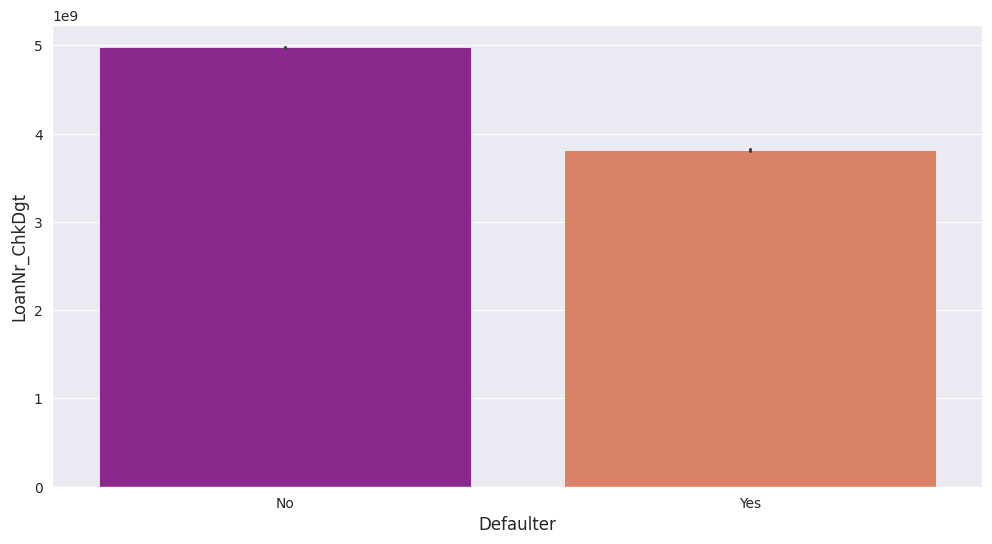

In [15]:
# plot the graph using the default estimator mean
sns.barplot(x='Defaulter', y='LoanNr_ChkDgt', data=Simplon_Data, hue='Defaulter', palette='plasma')


<Axes: xlabel='Defaulter', ylabel='Term'>

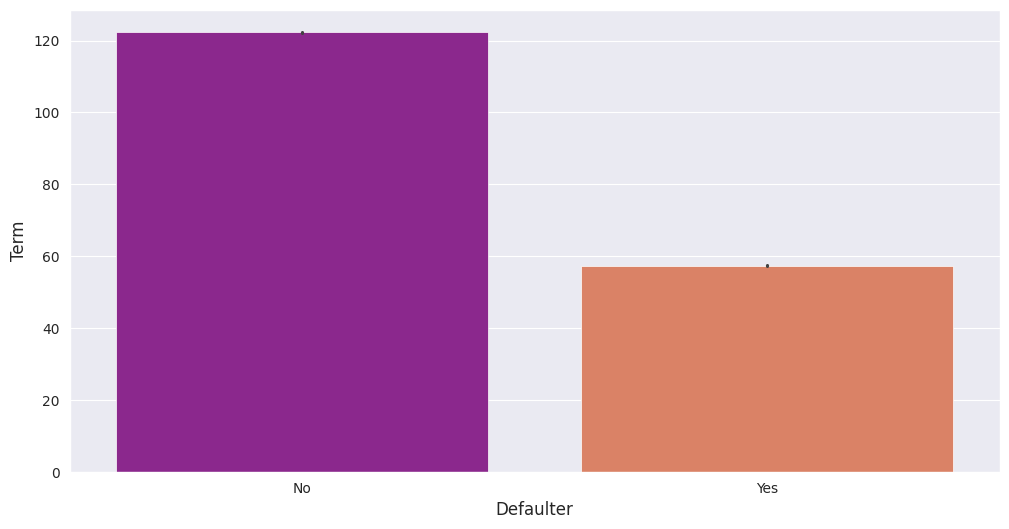

In [16]:
# plot the graph using the default estimator mean
sns.barplot(x='Defaulter', y='Term', data=Simplon_Data, hue='Defaulter', palette='plasma')


<Axes: xlabel='Defaulter', ylabel='Term'>

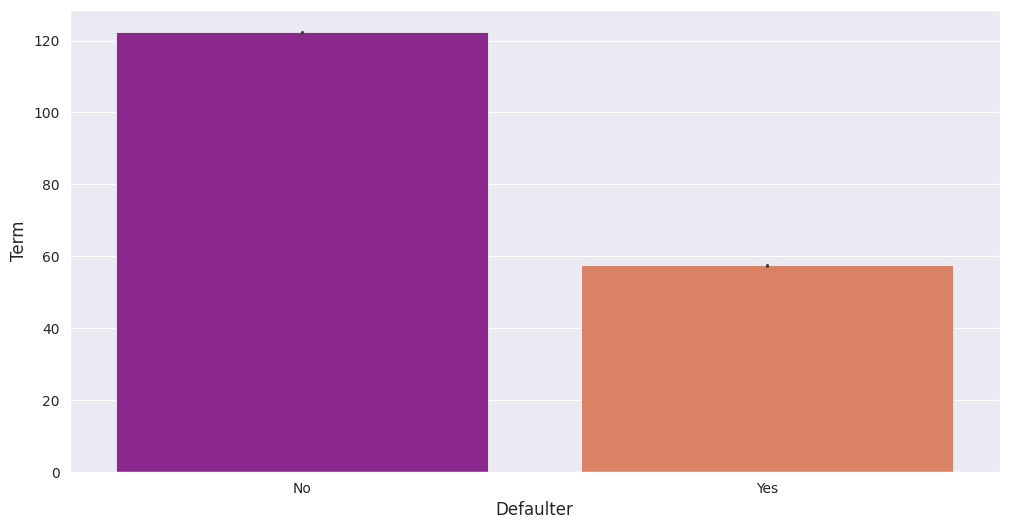

In [17]:
# plot the graph using the default estimator mean
# the Term column exists in Simplon Data (instead of TermInMonths)
# the result is similar
sns.barplot(x='Defaulter', y='Term', data=Simplon_Data, hue='Defaulter', palette='plasma')


In [18]:
import datetime as dt

#Convert Date fields to datetime format
Simplon_Data['ApprovalDate'] = pd.to_datetime(Simplon_Data['ApprovalDate'], format='%d-%b-%y')

Simplon_Data['ApprovalDate'] = Simplon_Data['ApprovalDate'].apply(
    lambda x: x - pd.DateOffset(years=100) if x.year > 2014 else x)
 

In [19]:
#Lets check how many transactions or records are present for each Approval Date
Simplon_Data.groupby('ApprovalDate').size()

ApprovalDate
1961-12-07    1
1964-11-27    1
1966-05-18    1
1967-02-28    1
1967-04-25    1
             ..
2014-06-12    1
2014-06-18    1
2014-06-19    1
2014-06-23    1
2014-06-25    1
Length: 9859, dtype: int64

From the grouping, we can see that there is an almost uniform distribution of data on the different approval dates. 

In [20]:

# from conversion_functions import get_ApprovalFY_code
# Simplon_Data['ApprovalFY']  = Simplon_Data['ApprovalFY'].apply(lambda x : get_ApprovalFY_code(x))

Simplon_Data['ApprovalFY'] = Simplon_Data['ApprovalDate'].apply(lambda x : x.year)
#Lets check how many transactions or records are present for each Approval Fiscal Year

Simplon_Data.groupby('ApprovalFY').size()

ApprovalFY
1961        1
1964        1
1966        1
1967        3
1968        3
1969        4
1970       19
1971       15
1972       46
1973       46
1974       32
1975       49
1976       88
1977      141
1978      270
1979      361
1980      576
1981      598
1982      852
1983     1848
1984     1993
1985     1981
1986     2198
1987     2139
1988     4333
1989    13574
1990    15002
1991    16484
1992    21122
1993    25032
1994    37030
1995    41847
1996    40848
1997    37744
1998    35783
1999    37693
2000    36796
2001    38370
2002    47496
2003    62247
2004    71281
2005    75115
2006    77247
2007    67016
2008    30786
2009    19696
2010    16774
2011     9670
2012     5053
2013     1732
2014      128
dtype: int64

<Axes: xlabel='Defaulter', ylabel='ApprovalFY'>

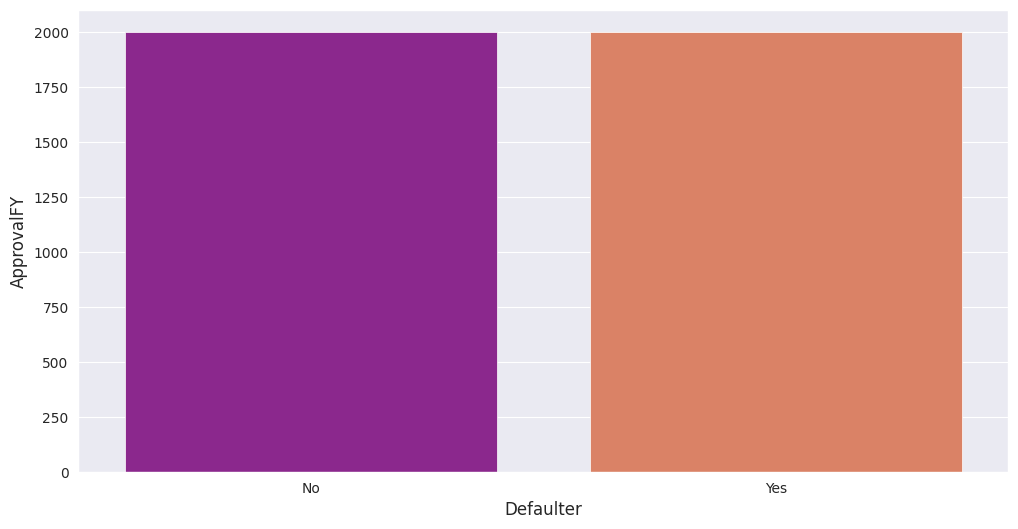

In [21]:
# plot the graph using the default estimator mean
sns.barplot(x='Defaulter', y='ApprovalFY', data=Simplon_Data, hue='Defaulter', palette='plasma')


<a id="subsection3.5"></a>
### Visualize Relationships between categorical data

In [22]:
# Cross tabulation between BusinessType and LOANSTATUS/Defaulter variables
CrosstabResult=pd.crosstab(index=Simplon_Data['BusinessType'],columns=Simplon_Data['Defaulter'])
print(CrosstabResult)
CrosstabResult.plot.bar()

KeyError: 'BusinessType'

<a id="section4"></a>
## 4. Encoding the Categorical Variables

Our dataset consists of several categorical variables. Due to High cardinality of some attributes, we discarded some of them, since variables with cardinality more than even 50 % in a large dataset makes training our model less efficient. The next thing is the requirement of numeric input/output variables by many Machine Learning Models. Since we have several attributes that are categorical, it is best to encode them using one of the Encoding methods that are available. Then we can apply algorithms from the for modeling. Let's use encoding for our categorical variables.

In [ ]:
#We have a very large dataset with categorical data. So lets take a smaller dataset, pertaining to a certain 'Project State', in order to quickly process our algorithm.
Data_filtered = Simplon_Data[Simplon_Data['State']=="NY"]

State="NY"
 
# Print the new dataframe
Data_filtered.head()

In [ ]:
Dataset_Size=len(Data_filtered)

# Print the shape of the dataframe
Data_filtered.info()

<a id="subsection4.1"></a>
### 4. 1. OneHotEncoder()

In [ ]:
#import Encoder library files from sklearn
#import sklearn
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

#fill in missing values 
#We might encounter missing values when we take different samplings of the dataset.
#Based on our discover during exploratory analysis, we need to deal with such variables
#Data_filtered=Data_filtered['BusinessType'].fillna("Not Mentioned", inplace = True)
#Data_filtered=Data_filtered['CongressionalDistrict'].fillna(method='pad')

#Removing Columns since they both are highly correlated, and it has the same value in this subset of our data, i.e., name of the state
Data_filtered.drop(['State','SBADistrictOffice','BusinessType'],axis=1)

#create an instance
#drop='first' is called a dummy variable trap, and drops the dummy column

#OHE = OneHotEncoder(drop='first')

#OHE_df = pd.DataFrame(OHE.fit_transform(Data_filtered[['BusinessType']]).toarray())
#OHE_df.info()

#Data_New =Data_filtered.join(OHE_df)
#Data_New.head()

In [ ]:
#drop 'BusinessType' column
#Data_New.drop('BusinessType', axis=1, inplace=True)

Data_filtered.info()

<a id="subsection4.2"></a>
### 4. 2. LabelEncoder()

In [ ]:
#Many algorithms we intend to run do not support categorical variables
#Wecan encode the target variable usng LabelEncoder()
LE=LabelEncoder()

Data_filtered['MIS_Status']=LE.fit_transform(Data_filtered['MIS_Status'])
Data_filtered['MIS_Status'].describe()

In [ ]:
Data_filtered['Defaulter']=LE.fit_transform(Data_filtered['Defaulter'])

Data_filtered['Defaulter'].describe()

In [ ]:
x_data=Data_filtered[['ApprovalFY','InitialInterestRate','Term','NAICS','CongressionalDistrict','JobsSupported']]
y_data=Data_filtered['Defaulter']

In [ ]:
x_data.info()

In [ ]:
y_data.describe()

In [ ]:
#x_data=x_data.dropna()
#x_newdata = x_data[np.isfinite(x_data).all(1)]
#x_newdata =x_newdata.reset_index()

<a id="section5"></a>
## 5. 1. Splitting the Dataset into Training and Testing Sets

We need to split the data into Training set and Test Set in order to perform Training and Modeling of the Machine Learning algorithm. Let's use the sklearn library to do this. We must arrange the dataset as features and target attributes, before we can proceed, since we have raw data with us. Here, the outcome or target labels are in the "LoanStatus" Column. So we can set that as the target variable. 

In [ ]:
#Split the Dataset into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle=False)

#Check the shape of the training and testing sets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

<a id="section6"></a>
## 6. Train a Model using the training set and make predictions using Test set

The next steps are iterative, until we find the best model that gives accurate results. With this loan dataset, we can try out the modeling with data from different project States of USA. Set the Project state value to the different values in that column. This helps you to get different datasets to try out.

The next thing is to change the size of the Training set and Testing set and to run the models again, until we find the best model. These and other parameters related to different Machine Learning Algorithms are hyper parameters, that can be tuned until we get the best model. 

In [ ]:
# Normalizing the features for stable and fast training.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
#Import necessary libraries from sklearn
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

<a id="subsection6.1"></a>
### 6. 1. Decision Tree

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 

  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(x_train, y_train)

In [ ]:
print('Training Accuracy : ', roc_auc_score(y_train, regressor.predict(x_train)))
print('Validation Accuracy : ', roc_auc_score(y_test, regressor.predict(x_test)))
print()

In [ ]:
#Recollecting the US state name used and Dataset Size
print("Project State:",Project_State)
print("Size of Dataset:",Dataset_Size)

<a id="subsection6.2"></a>
### 6. 2. Support Vector Machine

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(x_train, y_train)

In [ ]:
print('Training Accuracy : ', roc_auc_score(y_train, model.predict(x_train)))
print('Validation Accuracy : ', roc_auc_score(y_test, model.predict(x_test)))
print()

In [ ]:
LE_result_decode = dict(zip(LE.classes_, LE.transform(LE.classes_)))
print(LE_result_decode)

In [ ]:
confusion_matrix(y_train, model.predict(x_train))

In [ ]:
cm = confusion_matrix(y_train, model.predict(x_train))
fig, ax = plt.subplots(figsize=(5, 5))
#ax.imshow(cm)
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted_Not_Eligible', 'Predicted_Eligible'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual_Not_Eligible', 'Actual_Eligible'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(classification_report(y_train, model.predict(x_train)))

<a id="subsection6.3"></a>
### 6. 3. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(x_train, y_train)


In [ ]:
model.predict_proba(x_train)

In [ ]:
model.predict(x_train)

In [ ]:
confusion_matrix(y_train, model.predict(x_train))

In [ ]:
cm = confusion_matrix(y_train, model.predict(x_train))
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted_Not_Eligible', 'Predicted_Eligible'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual_Not_Eligible', 'Actual_Eligible'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(classification_report(y_train, model.predict(x_train)))

<a id="subsection6.4"></a>
### 6. 4. Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(x_train, y_train)

In [ ]:
print("Actual Value:", y_test)

In [ ]:
print("Predicted Value:", predicted)
print(LE_result_decode)
if predicted==0:
    print("Applicant is Eligible for Loan Approval.")
elif predicted==1:
    print("Applicant is Not Eligible for Loan Approval.")

<a id="section7"></a>
## 7. Comparison of Algorithms

In [ ]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# evaluate each model in turn
results = []
names=[]
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10)
 cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<a id="section8"></a>
## 8. References:

##### https://www.tandfonline.com/doi/epdf/10.1080/10691898.2018.1434342?needAccess=true&role=button
##### https://towardsdatascience.com/predict-loan-eligibility-using-machine-learning-models-7a14ef904057
##### https://github.com/mridulrb/Predict-loan-eligibility-using-IBM-Watson-Studio
##### https://www.analyticsvidhya.com/blog/2022/05/loan-prediction-problem-from-scratch-to-end/
##### https://www.kdnuggets.com/2021/05/deal-with-categorical-data-machine-learning.html

#### Data Profiling: 
##### https://towardsdatascience.com/automated-data-profiling-99523e51048e
##### https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee
##### https://realpython.com/logistic-regression-python/

#### Visualize relationship between categorical data:
How to visualize the relationship between two categorical variables in Python - Thinking Neuron

#### Training and Splitting
##### https://www.aboutdatablog.com/post/splitting-your-data-to-fit-any-machine-learning-model

#### Dataset:
##### https://data.world/nerb/sba-loan-guarantee-data/workspace/file?filename=7a_504_FOIA%2520Data%2520Dictionary.xlsx

#### Categorical encoding cheat sheet
##### https://www.kdnuggets.com/2021/05/deal-with-categorical-data-machine-learning.html